<a href="https://colab.research.google.com/github/haluvibe/time-series/blob/main/simple_time_series.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Check for GPU
!nvidia-smi -L

NVIDIA-SMI has failed because it couldn't communicate with the NVIDIA driver. Make sure that the latest NVIDIA driver is installed and running.



In [ ]:
import pandas as pd
import math
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/BITSTAMP_BTCUSD, 3 (1).csv')
# Convert Unix timestamp to datetime object
df["time"] = pd.to_datetime(df["time"], unit="s")
# Set time column as index
df.set_index("time", inplace=True)
# cols_to_keep = ['time', 'close', 'USDT.D, CRYPTOCAP: Close', '24H Volume']
variable1 = 'close'
variable2 = 'USDT.D, CRYPTOCAP: Close'
cols_to_keep = ['time', variable1, variable2]
# Only want closing price for each day 
df = pd.DataFrame(df[[variable1, variable2]])
df.head()
max_lag = int(len(df) / 2)
print(max_lag)
print(df.info())
print(df.shape)
print(len(df))

150
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 301 entries, 2023-04-03 19:21:00 to 2023-04-04 10:21:00
Data columns (total 2 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   close                     301 non-null    int64  
 1   USDT.D, CRYPTOCAP: Close  301 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 7.1 KB
None
(301, 2)
301


                     close  USDT.D, CRYPTOCAP: Close
time                                                
2023-04-03 19:21:00  28117                  6.964767
2023-04-03 19:24:00  28123                  6.964522
2023-04-03 19:27:00  28131                  6.963146
2023-04-03 19:30:00  28156                  6.989417
2023-04-03 19:33:00  28152                  6.971528


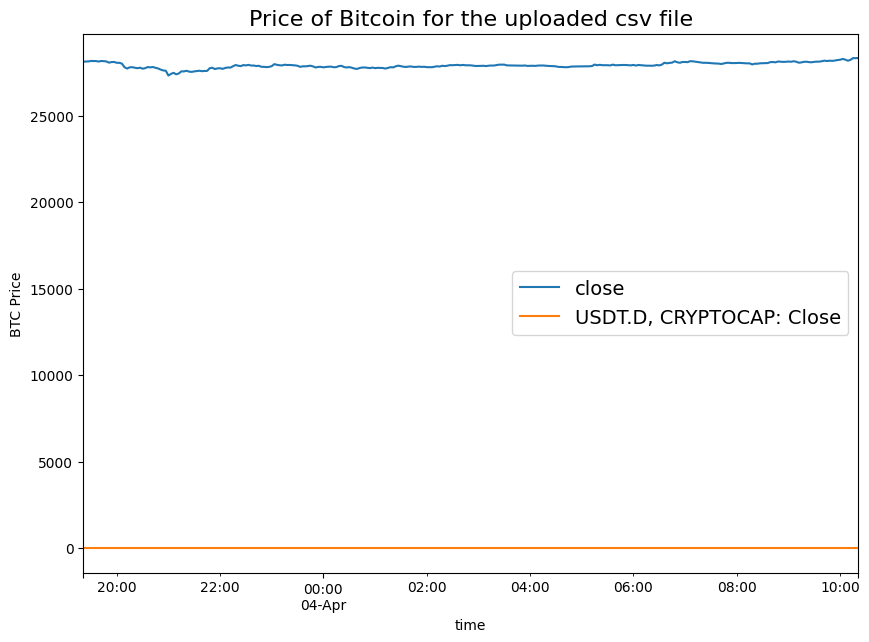

In [ ]:
import matplotlib.pyplot as plt
print(df.head())
df.plot(figsize=(10, 7))
plt.ylabel("BTC Price")
plt.title("Price of Bitcoin for the uploaded csv file", fontsize=16)
plt.legend(fontsize=14);

In [ ]:
# Get bitcoin date array
timesteps = df.index.to_numpy()
prices = df[variable1].to_numpy()

timesteps[:10], prices[:10]

(array(['2023-04-03T19:21:00.000000000', '2023-04-03T19:24:00.000000000',
        '2023-04-03T19:27:00.000000000', '2023-04-03T19:30:00.000000000',
        '2023-04-03T19:33:00.000000000', '2023-04-03T19:36:00.000000000',
        '2023-04-03T19:39:00.000000000', '2023-04-03T19:42:00.000000000',
        '2023-04-03T19:45:00.000000000', '2023-04-03T19:48:00.000000000'],
       dtype='datetime64[ns]'),
 array([28117, 28123, 28131, 28156, 28152, 28151, 28124, 28156, 28146,
        28129]))

In [ ]:
# Create train and test splits the right way for time series data
split_size = int(0.8 * len(prices)) # 80% train, 20% test

# Create train data splits (everything before the split)
X_train, y_train = timesteps[:split_size], prices[:split_size]

# Create test data splits (everything after the split)
X_test, y_test = timesteps[split_size:], prices[split_size:]

len(X_train), len(X_test), len(y_train), len(y_test)

(240, 61, 240, 61)

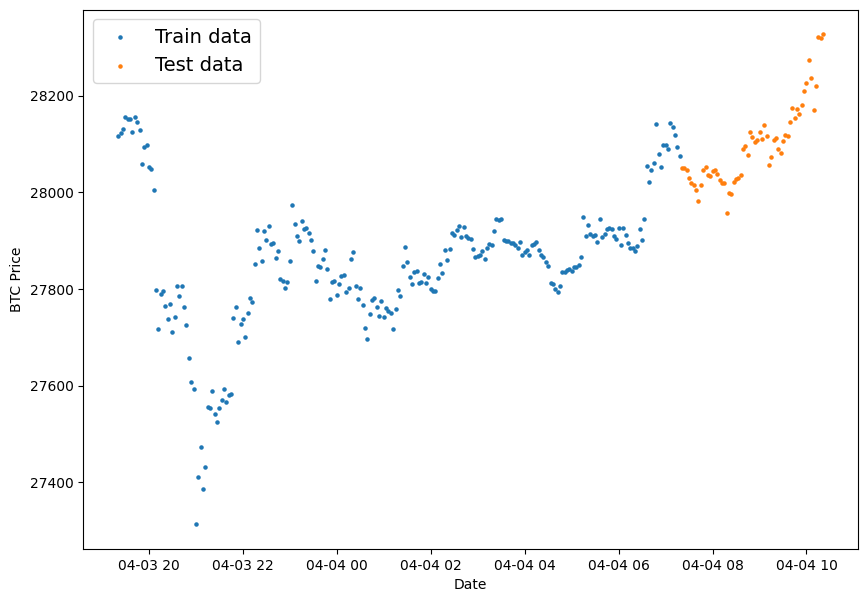

In [ ]:
# Plot correctly made splits
plt.figure(figsize=(10, 7))
plt.scatter(X_train, y_train, s=5, label="Train data")
plt.scatter(X_test, y_test, s=5, label="Test data")
plt.xlabel("Date")
plt.ylabel("BTC Price")
plt.legend(fontsize=14)
plt.show();